Welcome to the MCU Energy Mode Analyzer
0: 1.2 MHz
1: 6.6 MHz
2: 11.0 MHz
3: 14.0 MHz
4: 21.0 MHz
5: 28.0 MHz
6: 32.0 MHz

EM3 Power Consumption Report at 28.0 MHz
MCU Family  |   Power Consumption
-----------------------------
EFP23GT      |     126.00 uW
SI95A        |     166.60 uW

Most power-efficient MCU in EM3 at 28.0 MHz: EFP23GT


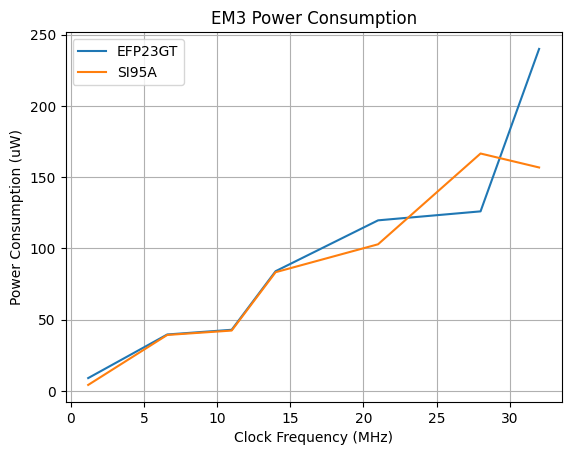

Invalid file path or not a CSV file. Please try again.
Invalid file path or not a CSV file. Please try again.
Invalid file path or not a CSV file. Please try again.
Invalid file path or not a CSV file. Please try again.


: 

In [1]:
import csv
import os
import matplotlib.pyplot as plt

# Constants
ENERGY_MODE_0 = "EM0"
ENERGY_MODE_1 = "EM1"
ENERGY_MODE_2 = "EM2"
ENERGY_MODE_3 = "EM3"
ENERGY_MODE_4 = "EM4"

COLUMN_MCU = "MCU"
COLUMN_ENERGY_MODE = "Energy Mode"
COLUMN_CLOCK_FREQUENCY = "Clock Frequency (MHz)"
COLUMN_OPERATING_TEMP = "Operating Temperature"
COLUMN_VDD_SUPPLY = "VDD Supply (V)"
COLUMN_CURRENT_CONSUMPTION = "Current Consumption (uA/MHz)"

# Data Structures
em0_dataset = {}
em1_dataset = {}
em2_dataset = {}
em3_dataset = {}
em4_dataset = {}

all_frequencies = []


def read_valid_integer(prompt, min_val, max_val):
    while True:
        try:
            value = int(input(prompt))
            if min_val <= value <= max_val:
                return value
            else:
                print(f"Please enter a number between {min_val} and {max_val}.")
        except ValueError:
            print("Invalid input. Please enter a number.")


def get_valid_file_path():
    while True:
        file_path = input("Enter the path to the CSV file or 'q' to quit: ")
        if file_path.lower() == 'q':
            exit()
        elif os.path.isfile(file_path) and file_path.endswith('.csv'):
            return file_path
        else:
            print("Invalid file path or not a CSV file. Please try again.")


def append_power_value(dataset, mcu_name, power_value):
    if mcu_name not in dataset:
        dataset[mcu_name] = []
    dataset[mcu_name].append(power_value)


def print_power_report(energy_mode, dataset, frequency_index, frequencies):
    frequency = frequencies[frequency_index]
    print(f"\n{energy_mode} Power Consumption Report at {frequency} MHz")
    print("MCU Family  |   Power Consumption")
    print("-----------------------------")

    min_power = float('inf')
    most_efficient_mcu = None

    for mcu, powers in dataset.items():
        power = powers[frequency_index]
        print(f"{mcu:12} | {power:10.2f} uW")
        if power < min_power:
            min_power = power
            most_efficient_mcu = mcu

    print(f"\nMost power-efficient MCU in {energy_mode} at {frequency} MHz: {most_efficient_mcu}")


def create_plot(energy_mode, dataset, frequencies, folder_path):
    for mcu, powers in dataset.items():
        plt.plot(frequencies, powers, label=mcu)

    plt.xlabel("Clock Frequency (MHz)")
    plt.ylabel("Power Consumption (uW)")
    plt.title(f"{energy_mode} Power Consumption")
    plt.legend()
    plt.grid(True)

    pdf_path = os.path.join(folder_path, f"{energy_mode}-PowerConsumption.pdf")
    plt.savefig(pdf_path)
    plt.show()
    plt.clf()


def main():
    print("Welcome to the MCU Energy Mode Analyzer")

    while True:
        file_path = get_valid_file_path()
        with open(file_path, 'r') as file:
            reader = csv.DictReader(file)
            columns = reader.fieldnames

            em0_dataset.clear()
            em1_dataset.clear()
            em2_dataset.clear()
            em3_dataset.clear()
            em4_dataset.clear()
            all_frequencies.clear()

            for row in reader:
                mcu = row[COLUMN_MCU]
                energy_mode = row[COLUMN_ENERGY_MODE]
                clock_frequency = float(row[COLUMN_CLOCK_FREQUENCY])
                vdd_supply = float(row[COLUMN_VDD_SUPPLY])
                current_consumption = float(row[COLUMN_CURRENT_CONSUMPTION])

                power_consumption = current_consumption * vdd_supply * clock_frequency

                if clock_frequency not in all_frequencies:
                    all_frequencies.append(clock_frequency)

                if energy_mode == ENERGY_MODE_0:
                    append_power_value(em0_dataset, mcu, power_consumption)
                elif energy_mode == ENERGY_MODE_1:
                    append_power_value(em1_dataset, mcu, power_consumption)
                elif energy_mode == ENERGY_MODE_2:
                    append_power_value(em2_dataset, mcu, power_consumption)
                elif energy_mode == ENERGY_MODE_3:
                    append_power_value(em3_dataset, mcu, power_consumption)
                elif energy_mode == ENERGY_MODE_4:
                    append_power_value(em4_dataset, mcu, power_consumption)
                else:
                    print(f"Warning: energy mode {energy_mode} is not supported")

        all_frequencies.sort()

        while True:
            energy_mode = input("Enter the energy mode to analyze (EM0, EM1, EM2, EM3, EM4): ").upper()
            if energy_mode in [ENERGY_MODE_0, ENERGY_MODE_1, ENERGY_MODE_2, ENERGY_MODE_3, ENERGY_MODE_4]:
                break
            else:
                print("Invalid energy mode. Please try again.")

        for i, freq in enumerate(all_frequencies):
            print(f"{i}: {freq} MHz")
        frequency_index = read_valid_integer("Select the frequency index: ", 0, len(all_frequencies) - 1)

        if energy_mode == ENERGY_MODE_0:
            print_power_report(ENERGY_MODE_0, em0_dataset, frequency_index, all_frequencies)
            create_plot(ENERGY_MODE_0, em0_dataset, all_frequencies, os.path.dirname(file_path))
        elif energy_mode == ENERGY_MODE_1:
            print_power_report(ENERGY_MODE_1, em1_dataset, frequency_index, all_frequencies)
            create_plot(ENERGY_MODE_1, em1_dataset, all_frequencies, os.path.dirname(file_path))
        elif energy_mode == ENERGY_MODE_2:
            print_power_report(ENERGY_MODE_2, em2_dataset, frequency_index, all_frequencies)
            create_plot(ENERGY_MODE_2, em2_dataset, all_frequencies, os.path.dirname(file_path))
        elif energy_mode == ENERGY_MODE_3:
            print_power_report(ENERGY_MODE_3, em3_dataset, frequency_index, all_frequencies)
            create_plot(ENERGY_MODE_3, em3_dataset, all_frequencies, os.path.dirname(file_path))
        elif energy_mode == ENERGY_MODE_4:
            print_power_report(ENERGY_MODE_4, em4_dataset, frequency_index, all_frequencies)
            create_plot(ENERGY_MODE_4, em4_dataset, all_frequencies, os.path.dirname(file_path))


if __name__ == "__main__":
    main()


Welcome to the MCU Energy Mode Analyzer
Select the energy mode to analyze:
1. EM0
2. EM1
3. EM2
4. EM3
5. EM4
0: 1.2 MHz
1: 6.6 MHz
2: 11.0 MHz
3: 14.0 MHz
4: 21.0 MHz
5: 28.0 MHz
6: 32.0 MHz

EM2 Power Consumption Report at 28.0 MHz
MCU Family  |   Power Consumption
-----------------------------
EFP23GT      |     126.00 uW
MIT88GE      |     117.60 uW
SI95A        |     166.60 uW

Most power-efficient MCU in EM2 at 28.0 MHz: MIT88GE


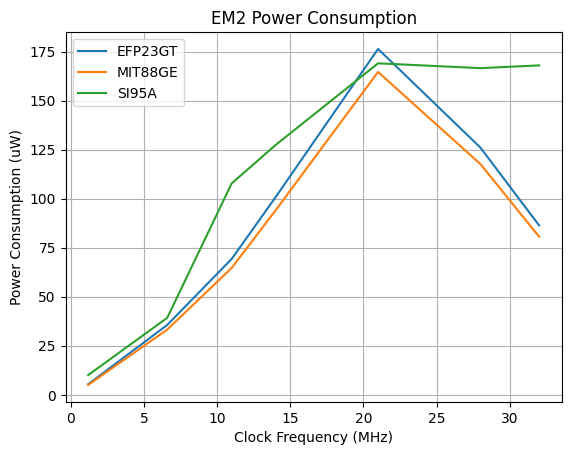

Select the energy mode to analyze:
1. EM0
2. EM1
3. EM2
4. EM3
5. EM4
0: 2.4 MHz
1: 3.5 MHz
2: 12.0 MHz
3: 17.0 MHz
4: 21.0 MHz
5: 25.0 MHz
6: 32.0 MHz
7: 36.0 MHz

EM3 Power Consumption Report at 21.0 MHz
MCU Family  |   Power Consumption
-----------------------------
SI55B28C     |     646.80 uW
EFM32K56B    |     793.80 uW
TM45P9B      |     658.56 uW
TX549B       |     806.40 uW

Most power-efficient MCU in EM3 at 21.0 MHz: SI55B28C


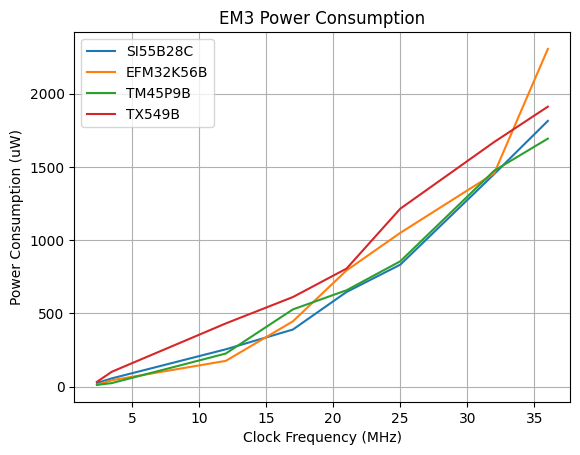

Invalid file path or not a CSV file. Please try again.
Invalid file path or not a CSV file. Please try again.
Invalid file path or not a CSV file. Please try again.
Invalid file path or not a CSV file. Please try again.
Invalid file path or not a CSV file. Please try again.
Invalid file path or not a CSV file. Please try again.


In [1]:
import csv
import os
import matplotlib.pyplot as plt

# Constants
ENERGY_MODES = ["EM0", "EM1", "EM2", "EM3", "EM4"]

COLUMN_MCU = "MCU"
COLUMN_ENERGY_MODE = "Energy Mode"
COLUMN_CLOCK_FREQUENCY = "Clock Frequency (MHz)"
COLUMN_OPERATING_TEMP = "Operating Temperature"
COLUMN_VDD_SUPPLY = "VDD Supply (V)"
COLUMN_CURRENT_CONSUMPTION = "Current Consumption (uA/MHz)"

# Data Structures
em0_dataset = {}
em1_dataset = {}
em2_dataset = {}
em3_dataset = {}
em4_dataset = {}

all_frequencies = []

def read_valid_integer(prompt, min_val, max_val):
    while True:
        try:
            value = int(input(prompt))
            if min_val <= value <= max_val:
                return value
            else:
                print(f"Please enter a number between {min_val} and {max_val}.")
        except ValueError:
            print("Invalid input. Please enter a number.")

def get_valid_file_path():
    while True:
        file_path = input("Enter the path to the CSV file or 'q' to quit: ")
        if file_path.lower() == 'q':
            exit()
        elif os.path.isfile(file_path) and file_path.endswith('.csv'):
            return file_path
        else:
            print("Invalid file path or not a CSV file. Please try again.")

def append_power_value(dataset, mcu_name, power_value):
    if mcu_name not in dataset:
        dataset[mcu_name] = []
    dataset[mcu_name].append(power_value)

def print_power_report(energy_mode, dataset, frequency_index, frequencies):
    frequency = frequencies[frequency_index]
    print(f"\n{energy_mode} Power Consumption Report at {frequency} MHz")
    print("MCU Family  |   Power Consumption")
    print("-----------------------------")

    min_power = float('inf')
    most_efficient_mcu = None

    for mcu, powers in dataset.items():
        power = powers[frequency_index]
        print(f"{mcu:12} | {power:10.2f} uW")
        if power < min_power:
            min_power = power
            most_efficient_mcu = mcu

    print(f"\nMost power-efficient MCU in {energy_mode} at {frequency} MHz: {most_efficient_mcu}")

def create_plot(energy_mode, dataset, frequencies, folder_path):
    for mcu, powers in dataset.items():
        plt.plot(frequencies, powers, label=mcu)
    
    plt.xlabel("Clock Frequency (MHz)")
    plt.ylabel("Power Consumption (uW)")
    plt.title(f"{energy_mode} Power Consumption")
    plt.legend()
    plt.grid(True)

    pdf_path = os.path.join(folder_path, f"{energy_mode}-PowerConsumption.pdf")
    plt.savefig(pdf_path)
    plt.show()
    plt.clf()

def main():
    print("Welcome to the MCU Energy Mode Analyzer")

    while True:
        file_path = get_valid_file_path()
        with open(file_path, 'r') as file:
            reader = csv.DictReader(file)
            columns = reader.fieldnames

            em0_dataset.clear()
            em1_dataset.clear()
            em2_dataset.clear()
            em3_dataset.clear()
            em4_dataset.clear()
            all_frequencies.clear()

            for row in reader:
                mcu = row[COLUMN_MCU]
                energy_mode = row[COLUMN_ENERGY_MODE]
                clock_frequency = float(row[COLUMN_CLOCK_FREQUENCY])
                vdd_supply = float(row[COLUMN_VDD_SUPPLY])
                current_consumption = float(row[COLUMN_CURRENT_CONSUMPTION])

                power_consumption = current_consumption * vdd_supply * clock_frequency

                if clock_frequency not in all_frequencies:
                    all_frequencies.append(clock_frequency)

                if energy_mode == ENERGY_MODES[0]:
                    append_power_value(em0_dataset, mcu, power_consumption)
                elif energy_mode == ENERGY_MODES[1]:
                    append_power_value(em1_dataset, mcu, power_consumption)
                elif energy_mode == ENERGY_MODES[2]:
                    append_power_value(em2_dataset, mcu, power_consumption)
                elif energy_mode == ENERGY_MODES[3]:
                    append_power_value(em3_dataset, mcu, power_consumption)
                elif energy_mode == ENERGY_MODES[4]:
                    append_power_value(em4_dataset, mcu, power_consumption)
                else:
                    print(f"Warning: energy mode {energy_mode} is not supported")

        all_frequencies.sort()

        while True:
            print("Select the energy mode to analyze:")
            for i, mode in enumerate(ENERGY_MODES):
                print(f"{i + 1}. {mode}")
            energy_mode_index = read_valid_integer("Enter the number corresponding to the energy mode: ", 1, 5) - 1
            energy_mode = ENERGY_MODES[energy_mode_index]

            for i, freq in enumerate(all_frequencies):
                print(f"{i}: {freq} MHz")
            frequency_index = read_valid_integer("Select the frequency index: ", 0, len(all_frequencies) - 1)

            if energy_mode == ENERGY_MODES[0]:
                print_power_report(ENERGY_MODES[0], em0_dataset, frequency_index, all_frequencies)
                create_plot(ENERGY_MODES[0], em0_dataset, all_frequencies, os.path.dirname(file_path))
            elif energy_mode == ENERGY_MODES[1]:
                print_power_report(ENERGY_MODES[1], em1_dataset, frequency_index, all_frequencies)
                create_plot(ENERGY_MODES[1], em1_dataset, all_frequencies, os.path.dirname(file_path))
            elif energy_mode == ENERGY_MODES[2]:
                print_power_report(ENERGY_MODES[2], em2_dataset, frequency_index, all_frequencies)
                create_plot(ENERGY_MODES[2], em2_dataset, all_frequencies, os.path.dirname(file_path))
            elif energy_mode == ENERGY_MODES[3]:
                print_power_report(ENERGY_MODES[3], em3_dataset, frequency_index, all_frequencies)
                create_plot(ENERGY_MODES[3], em3_dataset, all_frequencies, os.path.dirname(file_path))
            elif energy_mode == ENERGY_MODES[4]:
                print_power_report(ENERGY_MODES[4], em4_dataset, frequency_index, all_frequencies)
                create_plot(ENERGY_MODES[4], em4_dataset, all_frequencies, os.path.dirname(file_path))

            continue_choice = input("Do you want to continue with the same CSV file? (y/n): ").strip().lower()
            if continue_choice != 'y':
                break

if __name__ == "__main__":
    main()
